In [5]:
from subprocess import check_output
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

warnings.filterwarnings('ignore')
num_classes = 10
epochs = 20
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_df = pd.read_csv('./input/fashion-mnist_train.csv', sep=',')
test_df = pd.read_csv('./input/fashion-mnist_test.csv', sep = ',')

# print(check_output(["ls", "./input"]).decode("utf8"))

print(train_df.shape)

(60000, 785)


In [3]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


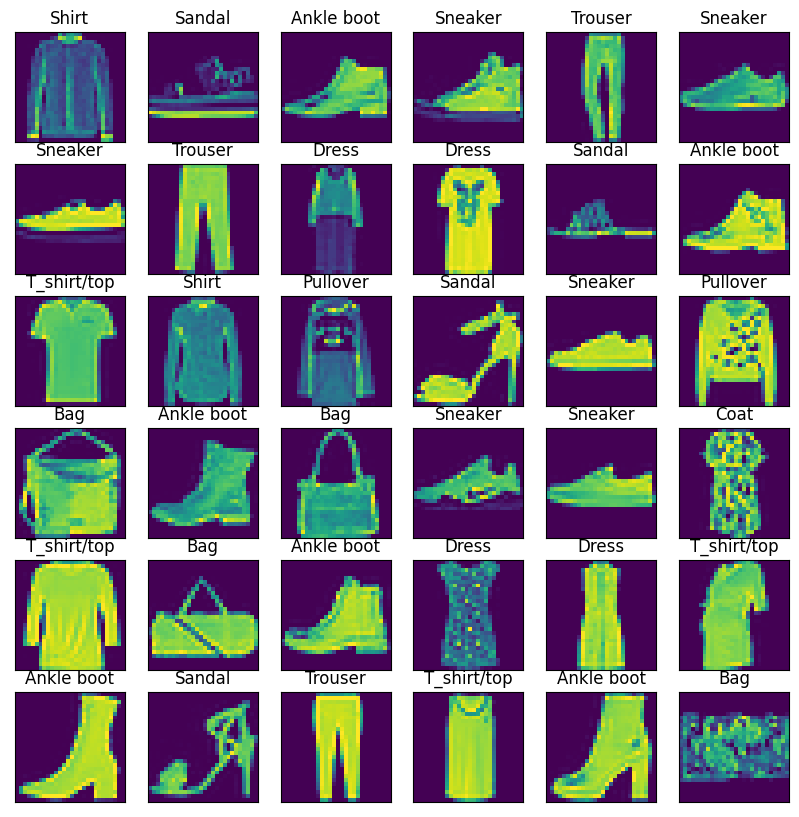

In [6]:
train_np = np.array(train_df, dtype = 'float32')
test_np = np.array(test_df, dtype='float32')

# Since the image data in x_train and x_test is from 0 to 255 ,  we need to rescale this from 0 to 1.To do this we need to divide the x_train and x_test by 255 . It's important that the training set and the testing set be preprocessed in the same way:
x_train = train_np[:,1:]/255
y_train = train_np[:,0]
x_test = test_np[:,1:]/255
y_test = test_np[:,0]

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12345)


plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [7]:
image_rows = 28
image_cols = 28
batch_size = 4096
# the shape of the image as 3d with rows and columns grey scale
image_shape = (image_rows, image_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *image_shape)
x_test = x_test.reshape(x_test.shape[0], *image_shape)
x_validate = x_validate.reshape(x_validate.shape[0], *image_shape)

x_validate

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [8]:
import time

start = time.time()
# , 'pool_size': 2 # down sampling the output instead of 28*28 it is 14*14
params = [
    # # -0.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0005
    #     , 'batch_size': 4096
    #     , 'epochs': 75},
    # + 0.12

    {   'model': Sequential([
            Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape, strides=1),    # Warstwa splotowa
            Dropout(0.2),
            MaxPooling2D(pool_size=2),
            Dropout(0.2), Flatten(),
            Dense(16, activation='relu'),                                                       # warstwa aktywacyjna (nieliniowości)
            Dense(10, activation = 'softmax')])                                                 # Warstwa w pełni połączona
        , 'adam_lr': 0.0025
        , 'batch_size': 64
        , 'epochs': 30},

    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         Dropout(0.2),
    #         MaxPooling2D(pool_size=2),
    #         Dropout(0.2), Flatten(),
    #         Dense(16, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 128
    #     , 'epochs': 30},


    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         Dropout(0.2),
    #         MaxPooling2D(pool_size=2),
    #         Dropout(0.2), Flatten(),
    #         Dense(32, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {   'model': Sequential([
    #         Conv2D(filters=16, kernel_size=4, activation='relu', input_shape = image_shape),
    #         MaxPooling2D(pool_size=2), Dropout(0.2), Flatten(),
    #         Dense(32, activation='relu'),
    #         Dense(10, activation = 'softmax')])
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {     'filters': 32
    #     , 'kernel_size': 4
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},

    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 1024
    #     , 'epochs': 30},
    #
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 2048
    #     , 'epochs': 30},

    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.0025
    #     , 'batch_size': 4096
    #     , 'epochs': 30},

    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.002
    #     , 'batch_size': 4096
    #     , 'epochs': 30},
    # -.01
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 24
    #     , 'adam_lr': 0.001
    #     , 'batch_size': 4096
    #     , 'epochs': 35},
    # {     'filters': 32
    #     , 'kernel_size': 3
    #     , 'pool_size': 2
    #     , 'dropout': 0.2
    #     , 'dense_units': 32
    #     , 'adam_lr': 0.001
    #     , 'batch_size': 4096
    #     , 'epochs': 35},
]

# for p in params:
p = params[0]
print('>>> Params: ', p)
cnn_model = p['model']
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=p['adam_lr']), metrics =['accuracy'])
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=p['batch_size'],
    epochs=p['epochs'],
    verbose=0,
    validation_data=(x_validate, y_validate),
)
score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('===========================')
print('>>>> Test Loss : {:.4f}'.format(score[0]))
print('>>>> Test Accuracy : {:.4f}'.format(score[1]))
print('===========================\n\n')
# cnn_model.reset_states()
# del cnn_model

diff = time.time() - start
print('It took me {:.2f} mins'.format(diff/60))

Metal device set to: Apple M1
>>> Params:  {'model': <keras.engine.sequential.Sequential object at 0x176c31810>, 'adam_lr': 0.0025, 'batch_size': 64, 'epochs': 50}


2023-03-06 15:17:08.516797: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-06 15:17:08.517201: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2023-03-06 15:17:08.955670: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-06 15:17:09.233740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-03-06 15:17:14.260721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


>>>> Test Loss : 0.2738
>>>> Test Accuracy : 0.9092


It took me 4.34 mins


In [9]:
from sklearn.metrics import classification_report

pred = cnn_model.predict(x_test)
predicted_classes = np.argmax(pred, axis=-1)
y_test = test_df.iloc[:, 0]

print(classification_report(y_test, predicted_classes, target_names=class_names))


 25/313 [=>............................] - ETA: 1s

2023-03-06 15:24:47.926003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

 T_shirt/top       0.82      0.89      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.84      0.89      0.86      1000
       Dress       0.91      0.93      0.92      1000
        Coat       0.90      0.82      0.86      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.77      0.69      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



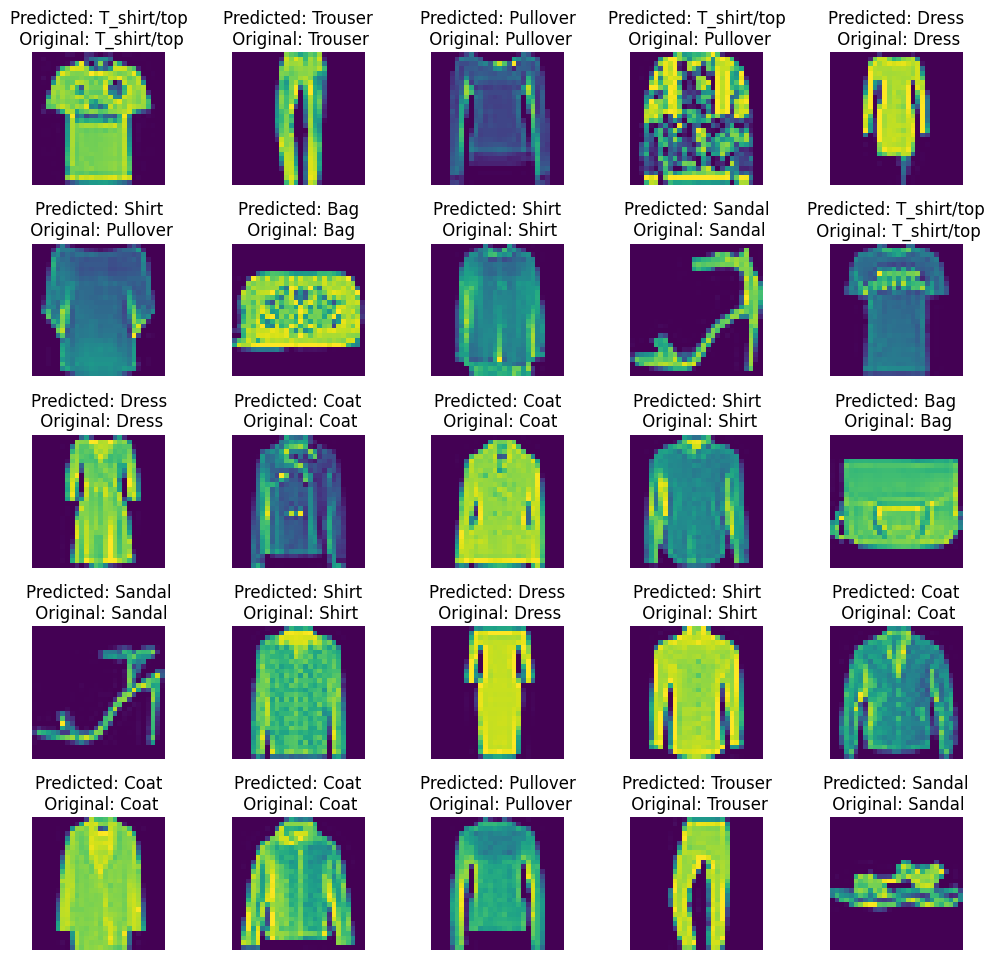

In [10]:

L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i].reshape(28,28))
    # axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n Original Class = {y_test[i]:0.1f}")
    axes[i].set_title(f"Predicted: {class_names[predicted_classes[i]]}\n Original: {class_names[y_test[i]]}")
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)